# **Resumo dos modelos**
Foram utilizados os modelo de Árvore de Decisão e Random Forest para prever clientes churner e não-churners desse e-commerce.

Utilizando métricas de desempenho dos modelos, ambos apresentaram ótimo desempenho para classifacar e prever novos usuários com base nas suas carectrísticas.

Para estudos futuros é ainda possível aprofundar a validações para entender esses modelos poderiam entrar em produção em uma empresa e utilizar para sub-grupos para segmentos de clientes específicos e não para o geral da base.

# **Bibliotecas, datasets e separação dos dados**

In [104]:
#Para importanção dos dados
import pandas as pd

#Função para separar dados de treino e teste
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#Métricas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

#Para gerar os gráficos ROC e AUC
import matplotlib.pyplot as plt

#Para gerar o gráfico de árvore do Random Forest
import numpy as np

In [105]:
#Importantando dataset
url = "https://github.com/PedroReste/prescriptive_and_prediction_analysis/raw/main/pt_analise_e_modelo_para_previsao_de_churn_em_ecommerce/ecommerce_dataset_tratado_e_sem_outliers.xlsx"
df = pd.read_excel(url)

In [106]:
#Separando a variável dependente e as variáveis independentes
X = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"]

#Separando dados de treino e teste
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

Aqui vale algumas observações de como foi divido os dados de treino e teste.

No notebook anterior foi observado que a proporção de churners e não-churners estavam para 20% e 80%, respectivamente.

Para gerar modelos mais interessantes, vamos deixar na mesma proporção utilizando o parâmetro **test_size** e o parâmetro **stratify** para distribuir os dados com base na variável churn.

# **Previsão de Churn**

Antes de rodar os modelos propostos, para melhor entendimento dos resultados é necessário explicar algumas métricas e termos.

**O que é o limiar de um modelo?**

O limiar é valor específico que torna-se o ponto de decisão sobre classificação das previsões em um modelo. 

- **Por exemplo:** em um modelo de previsão de churn, onde o resultado gerado pelo modelo é se os clientes são **churners** ou **não-churners**, o limiar vai servir como o ponto decisório de como classificar os clientes, porque o modelo vai prever a probabilidade de tal cliente ser churner ou não. Caso o limiar seja 0,5, todos clientes que tenham a probabilidade prevista acima 0,5 serão classificados como churners e os que tiverem abaixo serão classificados como não churners.

**O que são métricas de desempenho?**

As métricas de desempenho de um modelo de previsão nos auxíliam a entender a qualidade do modelo produzido.

**Quais métricas serão utilizadas?**

- **Acurácia ->** Capacidade de acerto do modelo de prever os resultados de maneira correta. Essa métrica auxília para entender a capacidade geral do modelo de prever os resultados corretamente.
    - **Fórmula ->** (Verdadeiros Positivos + Verdairos Negativos) / Total de Observações

- **Precisão ->** Capacidade de acerto dos verdadeiros positivos em relação ao total de positivos previsto pelo modelo, essa métrica é utilizada para entender a capacidade do modelo de acerta apenas os valores que são verdadeiramente positivos no modelo.
    - **Fórmula ->** Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)

- **Recall (Sensibilidade ou Taxa de Verdadeiros Positivos) ->** Capacidade de acerto dos verdadeiros positivos em relação ao total de positivos reais.
    - **Fórmula ->** Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)

- **F1-Score ->** O F1-Score é a média harmônica entre precisão e recall. Ele é útil quando você deseja equilibrar a importância da precisão e do recall.
    - **Fórmula ->** (2 * (Precisão * Recall)) / (Precisão + Recall)

- **Matriz de Confusão ->** A matriz de confusão mostra os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos que foram gerados pelo modelo. Também é utilizada para gerar a Taxa de Falsos Positivos gerados, observações que foram erroneamente classificadas como positivas (churners), e a Taxa de Falsos Negativos, observações que foram erroneamente classificadas como negativas (não-churners).
    - **Fórmula de Taxa de Falsos Positivos ->** Falsos Positivos / (Falsos Positivos + Verdadeiros Negativos)
    - **Fórmula de Taxa de Falsos Negativos ->** Falsos Positivos / (Falsos Negativos + Verdadeiros Positvos)

- **Curva ROC ->** Auxília a entender a capacidade do modelo de classificar novas observações, quando mais próximo de 1, melhor a capacidade de classificação do modelo.

**Validações adicionais**

- **Validação Cruzada ->** Separa os dados em subconjuntos para e roda o modelo uma certa quantidade de vezes para gerar um acurárcia média do resultado do modelo.

In [107]:
#Função para gerar o desempenho de modelo com as principais métricas de acordo com o limiar utilizado
def desempenho_do_modelo(modelo, test_x):
  
  #Criando uma lista para cada métrica
  list_limiar = []
  list_accuracy = []
  list_precision = []
  list_recall = []
  list_f1 = []
  list_false_positive_rate = []
  list_false_negative_rate = []
  
  #Salvando probabilidade  do modelo em uma variável
  prob_y = modelo.predict_proba(test_x)[:, 1]

  #Para cada limiar entre 0.1 a 0.9, gerar as métricas de desempenho do modelo
  for limiar in range(1, 10):
    list_limiar.append(str(limiar / 10))
    prediction = (prob_y > (limiar / 10)).astype(int)
    list_accuracy.append(round((accuracy_score(test_y, predicao) * 100), 2))
    list_precision.append(round((precision_score(test_y, predicao) * 100), 2))
    list_recall.append(round((recall_score(test_y, predicao) * 100), 2))
    list_f1.append(round((f1_score(test_y, predicao) * 100), 2))
    conf_matrix = confusion_matrix(test_y, prediction)
    list_false_positive_rate.append(((conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100).round(4))
    list_false_negative_rate.append(((conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])) * 100).round(4))
  
  #Gerando um dataframe com o desemepenho do modelo por métrica
  return pd.DataFrame({
      "Limiar": list_limiar,
      "Acurácia": list_accuracy,
      "Precisão": list_precision,
      "Recall": list_recall,
      "F1": list_f1,
      "Tx. Falso Positivo": list_false_positive_rate,
      "Tx. Falso Negativo": list_false_negative_rate
  }).set_index("Limiar")

## **Árvore de Decisão**

In [108]:
modelo = DecisionTreeClassifier()
modelo.fit(train_X, train_y)
predicao = modelo.predict(test_X)
conf_matrix = confusion_matrix(test_y, predicao)

In [109]:
desempenho_do_modelo(modelo, test_X)

,Acurácia,Precisão,Recall,F1,Tx. Falso Positivo,Tx. Falso Negativo
Limiar,,,,,,
0.1,96.92,90.71,91.21,90.96,1.9144,8.7912
0.2,96.92,90.71,91.21,90.96,1.9144,8.7912
0.3,96.92,90.71,91.21,90.96,1.9144,8.7912
0.4,96.92,90.71,91.21,90.96,1.9144,8.7912
0.5,96.92,90.71,91.21,90.96,1.9144,8.7912
0.6,96.92,90.71,91.21,90.96,1.9144,8.7912
0.7,96.92,90.71,91.21,90.96,1.9144,8.7912
0.8,96.92,90.71,91.21,90.96,1.9144,8.7912
0.9,96.92,90.71,91.21,90.96,1.9144,8.7912


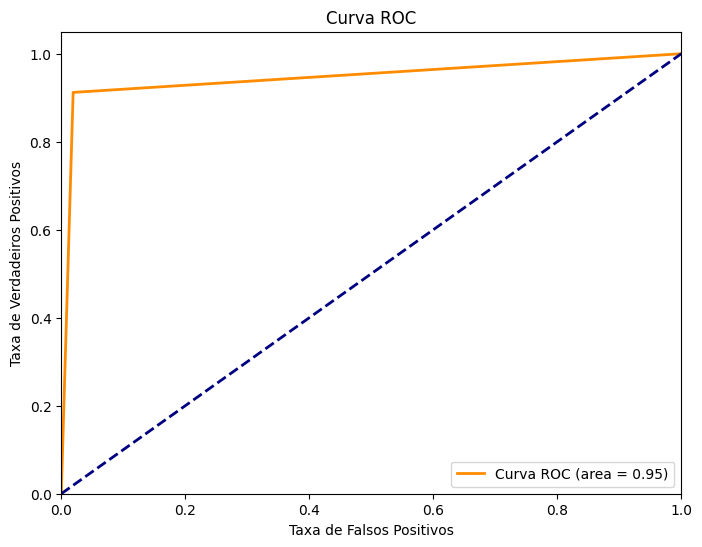

In [110]:
# Previsões de probabilidade para o conjunto de teste
y_prob = modelo.predict_proba(test_X)[:, 1]

# Calculando a curva ROC
fpr, tpr, threshold = roc_curve(test_y, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.savefig('curva_roc_decision_tree.png', bbox_inches='tight')

plt.show()

**Validação Cruzada**

In [111]:
scores = cross_val_score(modelo, X, y, cv= 10)
print(f"Acurácia média: {scores.mean():.2f} com desvio padrão de {scores.std():.2f}")

Acurácia média: 0.98 com desvio padrão de 0.01


**Gráfico mostrando a decisões tomadas**

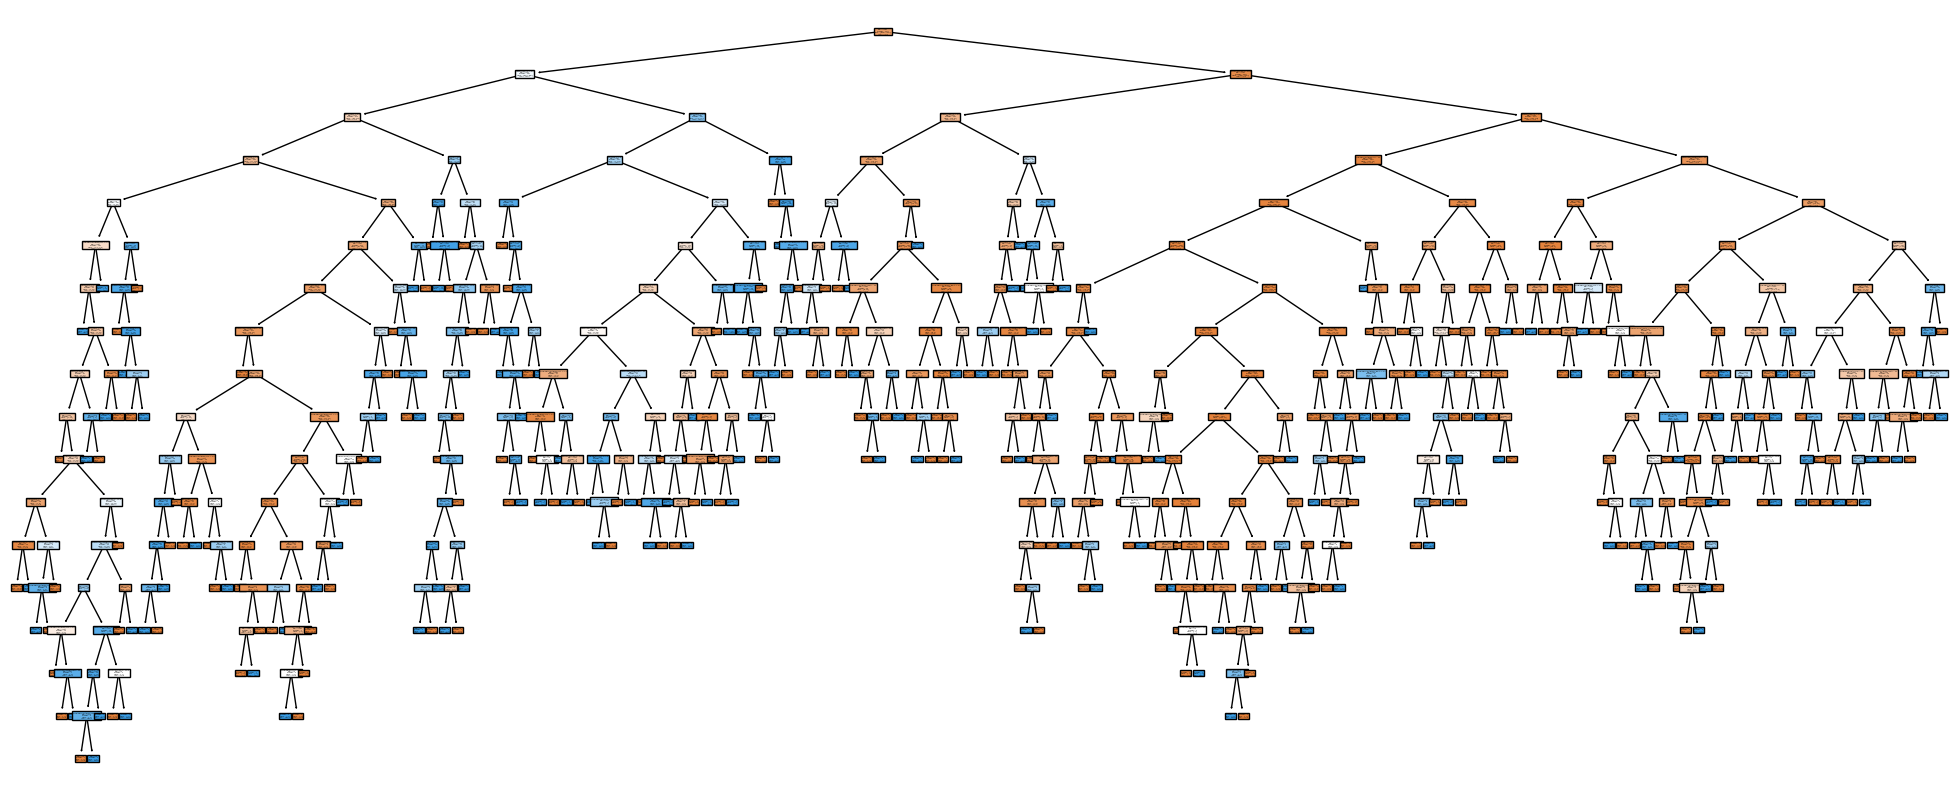

In [112]:
plt.figure(figsize=(25, 10))
plot_tree(modelo, filled=True, feature_names=df.columns[1:], class_names=df.columns[1:])

plt.savefig('decision_tree.png', bbox_inches='tight')

plt.show()

Esse gráfico é resultado visual do nosso modelo, classficando todas as observações com a quantidade de nós possíveis.

Para algo mais visual, vai ser utlizado no máximo 3 nós.

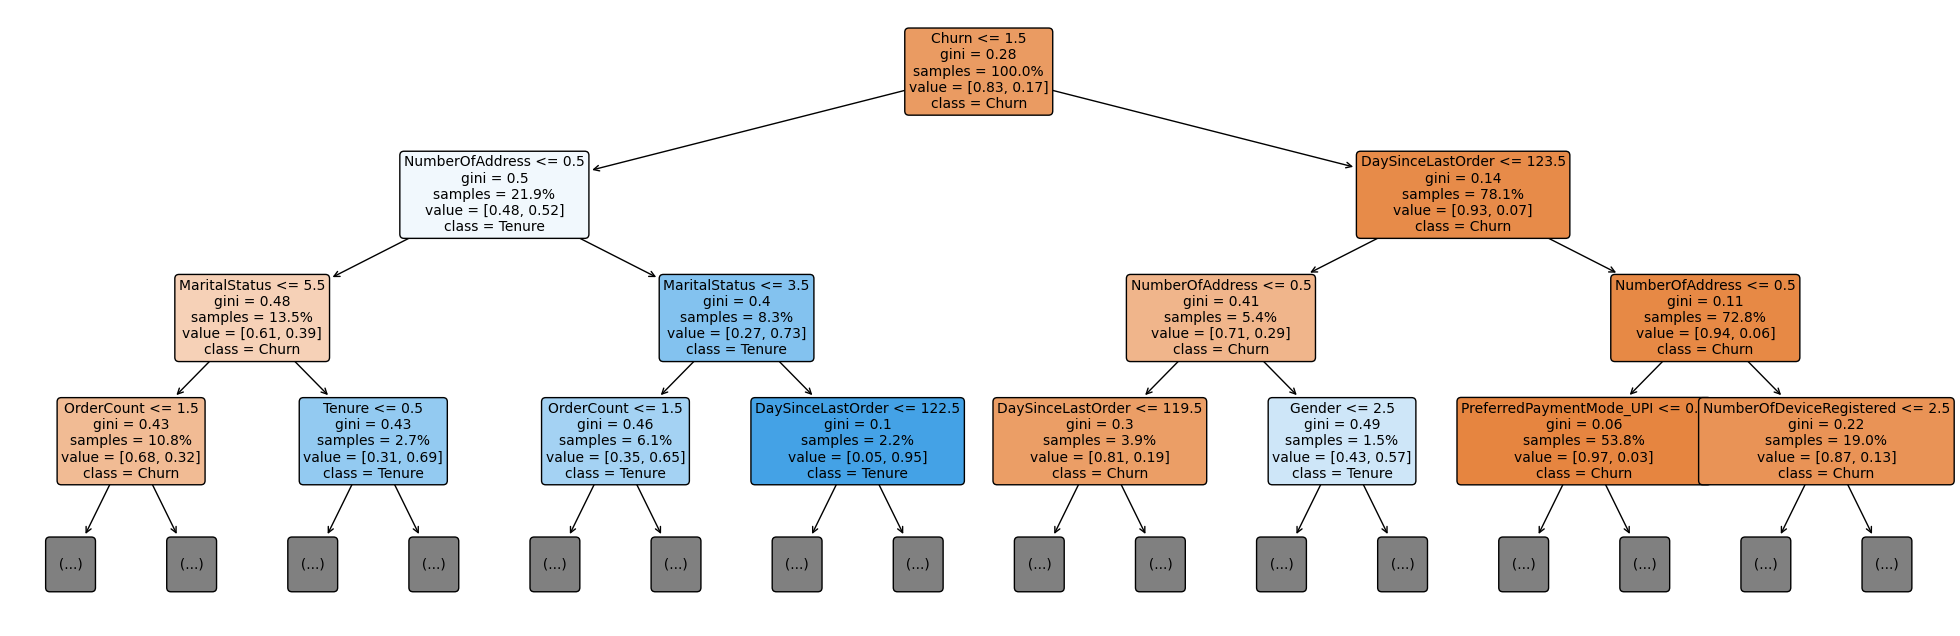

In [113]:
plt.figure(figsize=(25, 8))
plot_tree(modelo, max_depth=3, filled=True, feature_names=df.columns[1:], class_names=df.columns[1:],
          rounded=True, precision=2, fontsize=10, proportion=True)

plt.savefig('decision_tree_max_depth_3.png', bbox_inches='tight')
plt.show()

## **Random Forest Classifier**

In [114]:
modelo = RandomForestClassifier()
modelo.fit(train_X, train_y)
predicao = modelo.predict(test_X)
conf_matrix = confusion_matrix(test_y, predicao)

In [115]:
desempenho_do_modelo(modelo, test_X)

,Acurácia,Precisão,Recall,F1,Tx. Falso Positivo,Tx. Falso Negativo
Limiar,,,,,,
0.1,97.85,98.18,89.01,93.37,17.5676,0.0000
0.2,97.85,98.18,89.01,93.37,7.3198,1.0989
0.3,97.85,98.18,89.01,93.37,2.1396,2.7473
0.4,97.85,98.18,89.01,93.37,1.1261,4.9451
0.5,97.85,98.18,89.01,93.37,0.3378,10.9890
0.6,97.85,98.18,89.01,93.37,0.1126,21.9780
0.7,97.85,98.18,89.01,93.37,0.0000,39.5604
0.8,97.85,98.18,89.01,93.37,0.0000,62.0879
0.9,97.85,98.18,89.01,93.37,0.0000,90.1099


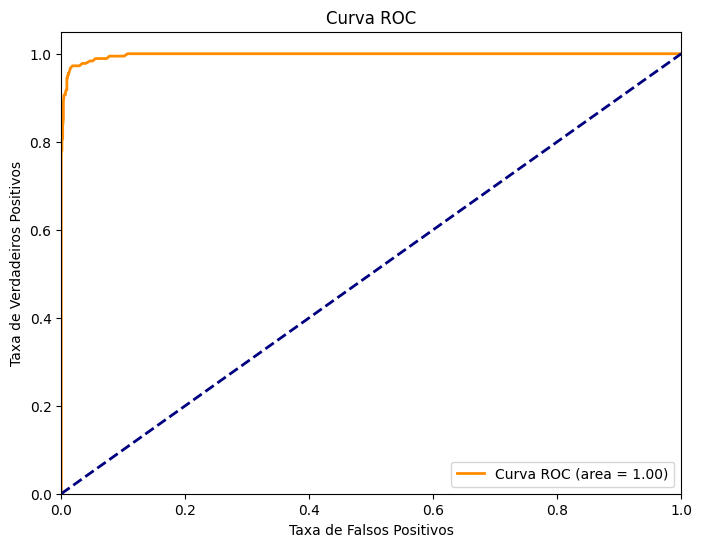

In [116]:
# Previsões de probabilidade para o conjunto de teste
y_prob = modelo.predict_proba(test_X)[:, 1]

# Calculando a curva ROC
fpr, tpr, threshold = roc_curve(test_y, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Validação Cruzada**

In [117]:
scores = cross_val_score(modelo, X, y, cv= 10)
print(f"Acurácia média: {scores.mean():.2f} com desvio padrão de {scores.std():.2f}")

Acurácia média: 0.99 com desvio padrão de 0.00
